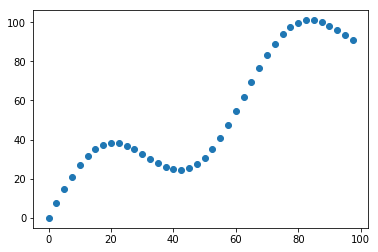

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

from IPython.display import HTML
%matplotlib inline

#定义输入数据
x_data=np.arange(100,step=2.5)
y_data=x_data+20*np.sin(x_data/10)


#绘制输入的数据点
plt.scatter(x_data,y_data)

n_samples=int(100/2.5)

x_data=np.reshape(x_data,(n_samples,1))
y_data=np.reshape(y_data,(n_samples,1))

x_test=np.random.rand(200)*120
x_test=x_test.reshape(-1,1)


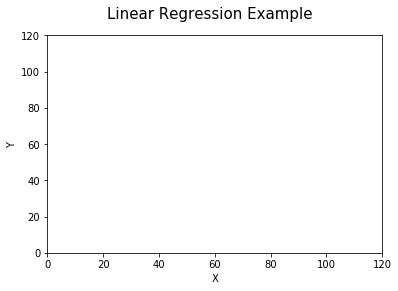

In [2]:


#定义placeholder
x=tf.placeholder(tf.float32,shape=(None,1))
y=tf.placeholder(tf.float32,shape=(None,1))

with tf.variable_scope("linear_regression"):
    W=tf.Variable([[0.]],'weight')
    b=tf.Variable([[10.]],'bias')
    
    y_pred=tf.matmul(x,W)+b
    loss=1./2*tf.reduce_mean((y-y_pred)**2)
    
opt=tf.train.AdamOptimizer(0.1)
opt_operation=opt.minimize(loss)

animation_fram=[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(500):
        _,loss_val=sess.run([opt_operation,loss],feed_dict={x:x_data,y:y_data})
        predict=sess.run(y_pred,feed_dict={x:x_test})
        animation_fram.append((x_test,predict,loss_val))
        
f,ax=plt.subplots(figsize=(6,4))
f.suptitle('Linear Regression Example',fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
ax.set_xlim(0,120)
ax.set_ylim(0,120)


line_d,=ax.plot([],[],label='fit_line')
dots,=ax.plot([],[],'bo',label='actual_dots')

frame_text=ax.text(0.02,0.95,'',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

def init():
    line_d.set_data([],[])
    dots.set_data([],[])
    return (line_d,)+(dots,)

def animate(i):
    line_d.set_data(animation_fram[i][0],animation_fram[i][1])
    
    dots.set_data(x_data,y_data)
    
    frame_text.set_text('Timestep=%.1d/%.1d\nLoss=%.3f'%(i,len(animation_fram),animation_fram[i][2]))
    return (line_d,)+(dots,)

# anim=animation.FuncAnimation(f,animate,init_func=init,frames=len(animation_fram),interval=30,blit=True)
# HTML(anim.to_html5_video())
#https://github.com/nndl/nndl-codes/blob/master/tensorflow/Linear_regression.ipynb
#有问题